<a href="https://colab.research.google.com/github/Shahilasulthana/DeepLearning/blob/main/Manual_SUP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])


In [ ]:
y_and = np.array([0, 0, 0, 1])
y_or  = np.array([0, 1, 1, 1])
y_xor = np.array([0, 1, 1, 0])


In [ ]:
class SinglePerceptron:
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                linear_output = np.dot(xi, self.weights) + self.bias
                prediction = 1 if linear_output >= 0 else 0
                update = self.lr * (target - prediction)
                self.weights += update * xi
                self.bias += update
    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)


In [ ]:
def plot_boundary(ax, X, y, model, title):
    xx, yy = np.meshgrid(
        np.linspace(-0.5, 1.5, 200),
        np.linspace(-0.5, 1.5, 200)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=100)
    ax.set_title(title)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")


In [ ]:
p_and = SinglePerceptron()
p_or  = SinglePerceptron()
p_xor = SinglePerceptron()

p_and.fit(X, y_and)
p_or.fit(X, y_or)
p_xor.fit(X, y_xor)


In [ ]:
print("AND predictions:", p_and.predict(X))
print("OR predictions :", p_or.predict(X))
print("XOR predictions:", p_xor.predict(X))


AND predictions: [0 0 0 1]
OR predictions : [0 1 1 1]
XOR predictions: [1 1 0 0]


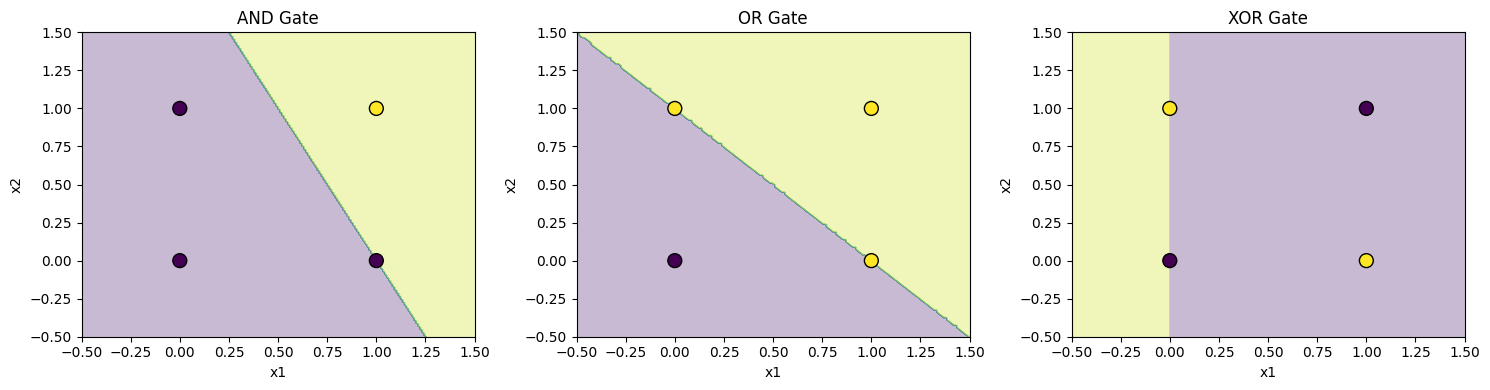

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

plot_boundary(axes[0], X, y_and, p_and, "AND Gate")
plot_boundary(axes[1], X, y_or,  p_or,  "OR Gate")
plot_boundary(axes[2], X, y_xor, p_xor, "XOR Gate")

plt.tight_layout()
plt.show()
